# Semester Project Update 2
####  16 April, 2019
#### John Coffin

The main focus of my dissertation is to understand how populations of mosquitofish, a small livebearing minnow, persist in creeks that have been contaminated with heavy metal mine waste. One potential mechanism enabling their persistence is through adaptive molecular evolution at genes involved with heavy metal homeostasis, but predicting which genes are putatively under selection has been a struggle. The purpose of my semester project is to generate scripts to analyze DNA sequence variation in several related fish species, which will enable me to identify regions of the genome of mosquitofish that may be experiencing positive natural selection. Positive selection occurs when potentially advantageous alleles sweep to fixation in a population, and identifying signatures of positive selection would allow me to identify the genes that are necessary to allow persistence in the polluted environment.

In order to identify selection, my scripts will need to accomplish several tasks: <br />
* Obtain sequence data from mosquitofish (data I have collected) and related species (data my lab has collected)
* Detect variants in each species to determine the major allele for each species
* Determine whether variants change the amino acid coded (nonsynonymous substitutions, dN) or not (synonymous substitutions, dS) <br />

If the ratio of dN/dS is greater than 1 for a gene, then those regions will merit further exploration to understand how natural selection is shaping those DNA sequences. <br />

Here is the progress I have made so far:

In [1]:
#Import modules


import glob                                           #glob is for managing the working directory

import Bio                                            #biopython

from Bio import SeqIO                                 #SeqIO is useful for inputting and outputting sequence files 
                                                      #and converting between different file formats
import pandas as pd

from Bio.Seq import Seq

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Set working directory

glob.os.chdir("/Users/johncoffin/Desktop/Coding/project/")

In [3]:
#Sequence inputs

Gaff = "ATGACTCCTCTTATTTACTCCACCCTAATTATCAGCCTTGGAATTGGCACCACCCTAACATTTGCCAGCACCCACTGATATCTCGCCTGAATAGGCATTGAAATCAACACATTAGCTATTATTCCCCTTATAACACAAAGCCACAGCCCCCGAGCAACTGAAGCCACCACTAAGTACTTCTTCGCACAAGCCACCGCCTCAGCCACACTTCTCTTCGCTGCTACCTCTAACGCTTTCTTCACTGGAAGTTGAGACATTCTTCAAACCAATAATCCCCTTACCTATACCCTAATAACCCTTGCCCTGGCCATAAAAATTGGCCTAGCCCCGCTTCACAGCTGAATGCCCGAAGTAATGCAAGGCCTAACTTTACTTACAGGCCTGATCCTTTCCACCTGACAAAAACTTGCCCCCTTTTGCCTTATTTATCAAATTCAACCGCACAGCCCGAACCTTTTCATGGCCTTAGGGCTCCTGTCCATTGTTGCAGGGGGATGAGGAGGCTTCAACCAAGTACAGCTACGAAAAATCCTTGCATACTCATCAATTGCCCATCTCGGATGAATAGTTCTTATCCTTTCTTTCTCGCCCCCTCTAACACTTGTTGCCTTTTCCACTTATCTTATAATAACTTTCTCCCTATTTTATTCTTTTATAATAACCAAAACCACACACATTAATTCCCTTTCCACCTCCTGAGCCAAAATTCCAACTCTCACCGCTTTAACCCCCCTAATTCTTCTCTCCCTTGGAGGCCTGCCCCCTCTAACAGGATTTTTACCAAAATGAATAATCCTTCAAGAACTGACCAAACAAGACCTAGCCCTAGTCGCCGTCCTCGCCGCCCTATTTTCACTCTTTAGTCTTTATTTTTACCTCCGACTATCATACGCAATAACATTAACTATACCCCCGAATAACCCCGCAGGAACCCTTCCTTGGCGACTCAACCCCTCCCACAATACCCTCCCCCCAGCTTTAACTACCACAATAACAATTTTTCTTCTCCCAATCACCCCAGCCTTTATAACACTCTTTTTCCTCTAA"
Pmex = "ATGGCTCCCCTAATCTACTCCGCCCTCATCATTAGTCTTGGCCTCGGTACAACCATAACCTTTGCCAGCACCCATTGATACCTTGCCTGAATAGGCATCGAAATTAATACATTAGCCATCATCCCTCTAATAGCCCAAAACCACATCCCCCGAGCAATTGAAGCTACCACTAAATACTTTTTTGTCCAAGCGACTGCCTCAGCAACACTTCTATTTGCTGGTATCTCCAACGCATTTCTAACCGGACAATGAGATATTACCTACACCCCCTATACCCTTACTTCTACACTAATTACCCTTGCCCTTGCAATAAAAATTGGCCTTGCCCCCCTTCACAGCTGAATACCAGAAGTAATGCAAGGCCTTAATTTACTTACCGGGCTGATTTTATCCACTTGACAAAAACTTGCCCCCTTATACCTAATTTATCAAATTCAACCAAACAACCCAAACATTTTTATTGCCTTAGGCCTTATATCTATTATTGTTGGAGGATGAGGAGGATTCAACCAAGTCCAACTTCGAAAAATCCTAGCATACTCATCAATCGCCCACCTAGGGTGAATAATCTTAATTCTCTCATTTTCACCCCCACTCGCCCTACTCACCATTATCATTTACATTTTAATAACCTTCTCATTATTCTCCTCTTTTATACTAACCCGCACCACCCATATCAACTCCCTTTCCACCACCTGAGCCAAAATTCCAATCCTTACTATTTCCACCCCTCTAATCCTTCTATCCCTAGGCGGACTACCCCCCCTTACAGGATTTATACCAAAATGAATAATCCTCCAAGAATTAACCAAACAAAGCCTATGCCCACTCGCCACCATAGCTGCACTCTCATCCCTTTTCAGCCTTTATTTTTACCTCCGACTATCATACGCAATAACACTCACTATACCACCAAATAACCCTGCAGGGACACTCCCATGACGACTTAACCCTCGACACAACACCCTTCCCCTAGCCCTAACAACCACCTCAACAATTTGCCTCCTTCCCATAACCCCCGCTATCATATCCCTAATACCTTTCTGA"
Psul = "ATGGCTCCCCCAATCTACTCCGCCCTCATCATCAGTCTTGGCCTCGGTACAACCATAACCTTTGCCAGCACCCATTGATTCCTTGCCTGAATAGGCATCGAAATTAATACATTAGCCATCATCCCTCTAATAGCCCAAAACCACATCCCCCGAGCAATTGAAGCTACCACTAAATACTTTTTTGTCCAAGCGACTGCCTCAGCAACACTTCTATTTGCTGGTATCTCCAACGCATTTCTTACCGGACAATGAGATATTACCCACACCCCCTATACCCTCACTTCTACACTAATTACCCTTGCCCTTGCAATAAAAATTGGCCTTGCCCCCCTTCACAGCTGAATACCAGAAGTAATGCAAGGCCTTAATTTACTTACCGGACTGATTCTATCCACTTGACAAAAACTTGCCCCCTTATACCTAATTTATCAAATTCAACCAAACAACCCAAACATTTTTATTGCCTTAGGCCTTCTATCTATTATTGTTGGAGGATGAGGAGGATTCAACCAAGTCCAACTTCGAAAAATCCTAGCATACTCATCAATCGCCCACCTAGGGTGAATAATCTTAATTCTCCCATTTTCACCCCCACTCGCCCTACTCACCATTATTATTTACATTTTAATAACCTTCTCATTATTCTCCTCTTTTATACTAACCCGCACCACCCACATCAACTCCCTTTCCACTACCTGAGCCAAAATTCCAATCCTTACTATCTCCACCCCCCTAATCCTTCTATCCCTAGGAGGACTACCCCCTCTTACAGGATTTATACCAAAATGAATAATCCTCCAAGAATTAACCAAACAAAGCCTATGCCCACTCGCCACCATAGCTGCACTCTCATCCCTTTTCAGCCTTTATTTTTACCTCCGACTATCATACGCAATAACACTCACTATACCACCAAATAACCCTGCAGGGACACTCCCATGACGACTTAACCCTCGACACAATACCCTTCCCCTAGCCCTAACAACCACCTCAACAATTTGCCTCCTTCCCATAACCCCCACTATCATATCCCTAATACCTTTCTAG"
Xmac = "ATGGCTCCCTTTGTTTACTCCACCCTTATCATTAGTCTTGGTCTCGGCACAGCCATAACCTTCGCCAGCACCCACTGATACCTCGCCTGAATAGGCATCGAAATCAATACACTAGCCATTATCCCCCTAATAACCCAAAACCACAACCCTCGAGCAATTGAAGCCACCACCAAATACTTTTTTGCACAAGCCACCGCTTCAGCAACACTGCTATTCGCCGCTGTCTCAAATGCATTCTTGACCGGGGGATGAGACATTCTTCAAATCAACCACCCCCTAACTTCCACACTCACCACCCTAGCTCTAGCTATAAAAATCGGTCTCGCCCCCCTCCACAGCTGAATGCCAGAAGTAATACAAGGCTTAAGCCTACTTACCGGCCTTATCCTTTCCACTTGGCAAAAACTTGCCCCCTTTTGCCTCATTTACCAAATTCAGCCAGACAACCCCAATGTTTTCATTACCTTAGGCCTCTTATCTGTGATCGTGGGCGGCTGAGGGGGTTTCAACCAAGTCCAACTCCGAAAAATTCTTGCATACTCATCAATCGCCCATCTGGGCTGAATAATTCTCATTCTCCCATTCTCACCCCCTCTCACCTTACTTACCCTTTTTACTTACCTAATAATGACCTTTTCACTTTTTTCCTCCTTCATACTAGTTCGCACCACACATATTAACTCTTTATCCATCTCCTGAGCCAAAATCCCAACTCTTACTGCTTCTGTCCCCCTCATCCTCTTATCCCTGGGAGGTCTACCACCCCTAACAGGATTCTTACCAAAATGACTTATCCTCCAAGAGTTAACCAAACAAGACCTGGCCCCAATTGCCACTCTCGCTGCCCTTTCATCCCTCTTCAGCCTTTATTTTTATCTCCGACTATCATACACAATAACACTCACTATGCCCCCAAACAACCCCGCCGGAACACTCCCCTGACGACTTAACCCCCAACACAACACCCTCCCCCTGGCTTTAACCACCACCACAACAATTTTCCTTCTCCCTGCCACCCCAACCATTCTGGCTCTTTTCACTTTCTGA"

In [4]:
#Find variants and invariants

non_sub = []
variants = []
for nt in range(0,len(Gaff)):
    if (Gaff[nt] == Pmex[nt] and Gaff[nt] == Psul[nt] and Gaff[nt] == Xmac[nt]):
        non_sub.append(nt)
    else:
        variants.append(nt)


variant_nucleotides = []
variant_index = []

for nt in variants:
    variant_nucleotides.append(Gaff[nt])
    variant_index.append(nt)
    
snps = pd.DataFrame(variant_nucleotides, variant_index)
snps

0
3     A
8     T
9     C
10    T
11    T
12    A
14    T
21    A
26    A
29    T
32    C
35    C
41    A
42    A
44    T
47    C
50    C
51    A
54    C
59    A
62    T
74    C
79    A
80    T
83    C
98    T
104   C
107   C
111   T
116   T
...  ..
983   T
989   A
990   A
991   T
1000  T
1001  T
1004  T
1007  C
1010  A
1011  A
1012  T
1013  C
1019  A
1020  G
1022  C
1023  T
1025  T
1026  A
1028  A
1029  A
1031  A
1034  C
1035  T
1037  T
1038  T
1039  T
1040  C
1041  C
1045  A
1046  A

[320 rows x 1 columns]

In [5]:
#Calculate nucleotide diversity

global_diversity = lambda num_variants, seq_length: len(num_variants) / len(seq_length)

global_diversity(variants, Gaff)

0.30563514804202485

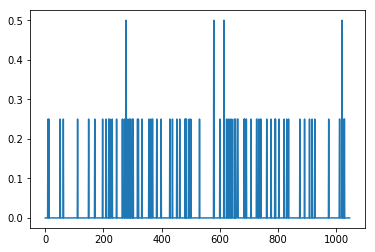

In [6]:
#Plot nucleotide diversity at each site in the gene sequence

nuc_diversity = []
for nt in range(0,len(Gaff)):
    if (Gaff[nt] == Pmex[nt] and Gaff[nt] == Psul[nt] and Gaff[nt] == Xmac[nt]):
        nuc_diversity.append(0)
    elif (Gaff[nt] == Pmex[nt] and Gaff[nt] == Psul[nt] and Gaff[nt] != Xmac[nt]):
        nuc_diversity.append(0.25)
    elif (Gaff[nt] == Pmex[nt] and Gaff[nt] != Psul[nt] and Gaff[nt] != Xmac[nt]):
        nuc_diversity.append(0.5)
    else:
        nuc_diversity.append(0)

plt.plot(nuc_diversity)

In [7]:
#Convert sequences to Seq objects in biopython and translate the nucleotides into amino acids

affinis = Seq("ATGACTCCTCTTATTTACTCCACCCTAATTATCAGCCTTGGAATTGGCACCACCCTAACATTTGCCAGCACCCACTGATATCTCGCCTGAATAGGCATTGAAATCAACACATTAGCTATTATTCCCCTTATAACACAAAGCCACAGCCCCCGAGCAACTGAAGCCACCACTAAGTACTTCTTCGCACAAGCCACCGCCTCAGCCACACTTCTCTTCGCTGCTACCTCTAACGCTTTCTTCACTGGAAGTTGAGACATTCTTCAAACCAATAATCCCCTTACCTATACCCTAATAACCCTTGCCCTGGCCATAAAAATTGGCCTAGCCCCGCTTCACAGCTGAATGCCCGAAGTAATGCAAGGCCTAACTTTACTTACAGGCCTGATCCTTTCCACCTGACAAAAACTTGCCCCCTTTTGCCTTATTTATCAAATTCAACCGCACAGCCCGAACCTTTTCATGGCCTTAGGGCTCCTGTCCATTGTTGCAGGGGGATGAGGAGGCTTCAACCAAGTACAGCTACGAAAAATCCTTGCATACTCATCAATTGCCCATCTCGGATGAATAGTTCTTATCCTTTCTTTCTCGCCCCCTCTAACACTTGTTGCCTTTTCCACTTATCTTATAATAACTTTCTCCCTATTTTATTCTTTTATAATAACCAAAACCACACACATTAATTCCCTTTCCACCTCCTGAGCCAAAATTCCAACTCTCACCGCTTTAACCCCCCTAATTCTTCTCTCCCTTGGAGGCCTGCCCCCTCTAACAGGATTTTTACCAAAATGAATAATCCTTCAAGAACTGACCAAACAAGACCTAGCCCTAGTCGCCGTCCTCGCCGCCCTATTTTCACTCTTTAGTCTTTATTTTTACCTCCGACTATCATACGCAATAACATTAACTATACCCCCGAATAACCCCGCAGGAACCCTTCCTTGGCGACTCAACCCCTCCCACAATACCCTCCCCCCAGCTTTAACTACCACAATAACAATTTTTCTTCTCCCAATCACCCCAGCCTTTATAACACTCTTTTTCCTCTAA")
mexicana = Seq("ATGGCTCCCCTAATCTACTCCGCCCTCATCATTAGTCTTGGCCTCGGTACAACCATAACCTTTGCCAGCACCCATTGATACCTTGCCTGAATAGGCATCGAAATTAATACATTAGCCATCATCCCTCTAATAGCCCAAAACCACATCCCCCGAGCAATTGAAGCTACCACTAAATACTTTTTTGTCCAAGCGACTGCCTCAGCAACACTTCTATTTGCTGGTATCTCCAACGCATTTCTAACCGGACAATGAGATATTACCTACACCCCCTATACCCTTACTTCTACACTAATTACCCTTGCCCTTGCAATAAAAATTGGCCTTGCCCCCCTTCACAGCTGAATACCAGAAGTAATGCAAGGCCTTAATTTACTTACCGGGCTGATTTTATCCACTTGACAAAAACTTGCCCCCTTATACCTAATTTATCAAATTCAACCAAACAACCCAAACATTTTTATTGCCTTAGGCCTTATATCTATTATTGTTGGAGGATGAGGAGGATTCAACCAAGTCCAACTTCGAAAAATCCTAGCATACTCATCAATCGCCCACCTAGGGTGAATAATCTTAATTCTCTCATTTTCACCCCCACTCGCCCTACTCACCATTATCATTTACATTTTAATAACCTTCTCATTATTCTCCTCTTTTATACTAACCCGCACCACCCATATCAACTCCCTTTCCACCACCTGAGCCAAAATTCCAATCCTTACTATTTCCACCCCTCTAATCCTTCTATCCCTAGGCGGACTACCCCCCCTTACAGGATTTATACCAAAATGAATAATCCTCCAAGAATTAACCAAACAAAGCCTATGCCCACTCGCCACCATAGCTGCACTCTCATCCCTTTTCAGCCTTTATTTTTACCTCCGACTATCATACGCAATAACACTCACTATACCACCAAATAACCCTGCAGGGACACTCCCATGACGACTTAACCCTCGACACAACACCCTTCCCCTAGCCCTAACAACCACCTCAACAATTTGCCTCCTTCCCATAACCCCCGCTATCATATCCCTAATACCTTTCTGA")
sulphuraria = Seq("ATGGCTCCCCCAATCTACTCCGCCCTCATCATCAGTCTTGGCCTCGGTACAACCATAACCTTTGCCAGCACCCATTGATTCCTTGCCTGAATAGGCATCGAAATTAATACATTAGCCATCATCCCTCTAATAGCCCAAAACCACATCCCCCGAGCAATTGAAGCTACCACTAAATACTTTTTTGTCCAAGCGACTGCCTCAGCAACACTTCTATTTGCTGGTATCTCCAACGCATTTCTTACCGGACAATGAGATATTACCCACACCCCCTATACCCTCACTTCTACACTAATTACCCTTGCCCTTGCAATAAAAATTGGCCTTGCCCCCCTTCACAGCTGAATACCAGAAGTAATGCAAGGCCTTAATTTACTTACCGGACTGATTCTATCCACTTGACAAAAACTTGCCCCCTTATACCTAATTTATCAAATTCAACCAAACAACCCAAACATTTTTATTGCCTTAGGCCTTCTATCTATTATTGTTGGAGGATGAGGAGGATTCAACCAAGTCCAACTTCGAAAAATCCTAGCATACTCATCAATCGCCCACCTAGGGTGAATAATCTTAATTCTCCCATTTTCACCCCCACTCGCCCTACTCACCATTATTATTTACATTTTAATAACCTTCTCATTATTCTCCTCTTTTATACTAACCCGCACCACCCACATCAACTCCCTTTCCACTACCTGAGCCAAAATTCCAATCCTTACTATCTCCACCCCCCTAATCCTTCTATCCCTAGGAGGACTACCCCCTCTTACAGGATTTATACCAAAATGAATAATCCTCCAAGAATTAACCAAACAAAGCCTATGCCCACTCGCCACCATAGCTGCACTCTCATCCCTTTTCAGCCTTTATTTTTACCTCCGACTATCATACGCAATAACACTCACTATACCACCAAATAACCCTGCAGGGACACTCCCATGACGACTTAACCCTCGACACAATACCCTTCCCCTAGCCCTAACAACCACCTCAACAATTTGCCTCCTTCCCATAACCCCCACTATCATATCCCTAATACCTTTCTAG")
maculatus = Seq("ATGGCTCCCTTTGTTTACTCCACCCTTATCATTAGTCTTGGTCTCGGCACAGCCATAACCTTCGCCAGCACCCACTGATACCTCGCCTGAATAGGCATCGAAATCAATACACTAGCCATTATCCCCCTAATAACCCAAAACCACAACCCTCGAGCAATTGAAGCCACCACCAAATACTTTTTTGCACAAGCCACCGCTTCAGCAACACTGCTATTCGCCGCTGTCTCAAATGCATTCTTGACCGGGGGATGAGACATTCTTCAAATCAACCACCCCCTAACTTCCACACTCACCACCCTAGCTCTAGCTATAAAAATCGGTCTCGCCCCCCTCCACAGCTGAATGCCAGAAGTAATACAAGGCTTAAGCCTACTTACCGGCCTTATCCTTTCCACTTGGCAAAAACTTGCCCCCTTTTGCCTCATTTACCAAATTCAGCCAGACAACCCCAATGTTTTCATTACCTTAGGCCTCTTATCTGTGATCGTGGGCGGCTGAGGGGGTTTCAACCAAGTCCAACTCCGAAAAATTCTTGCATACTCATCAATCGCCCATCTGGGCTGAATAATTCTCATTCTCCCATTCTCACCCCCTCTCACCTTACTTACCCTTTTTACTTACCTAATAATGACCTTTTCACTTTTTTCCTCCTTCATACTAGTTCGCACCACACATATTAACTCTTTATCCATCTCCTGAGCCAAAATCCCAACTCTTACTGCTTCTGTCCCCCTCATCCTCTTATCCCTGGGAGGTCTACCACCCCTAACAGGATTCTTACCAAAATGACTTATCCTCCAAGAGTTAACCAAACAAGACCTGGCCCCAATTGCCACTCTCGCTGCCCTTTCATCCCTCTTCAGCCTTTATTTTTATCTCCGACTATCATACACAATAACACTCACTATGCCCCCAAACAACCCCGCCGGAACACTCCCCTGACGACTTAACCCCCAACACAACACCCTCCCCCTGGCTTTAACCACCACCACAACAATTTTCCTTCTCCCTGCCACCCCAACCATTCTGGCTCTTTTCACTTTCTGA")

affinis_prot = affinis.translate()
mexicana_prot = mexicana.translate()
sulphuraria_prot = sulphuraria.translate()
maculatus_prot = maculatus.translate()

In [8]:
nonsyn = []
syn = []

for aa in range(0, len(affinis_prot)):
    if affinis_prot[aa] == maculatus_prot[aa]:
        syn.append(aa)
    else:
        nonsyn.append(aa)

In [9]:
dN_to_dS = len(nonsyn) / len(syn)

dN_to_dS

0.20344827586206896

What I need to figure out how to do now is find a way to calculate nonsyn and syn, but only for the sites identified as "variants" in cell 4 above.